<h1> Loading the Data </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class DataProcessor:
    def __init__(self, input_path, file_names):
        self.input_path = input_path
        self.file_names = file_names
        
    def read_files(self):
        self.data = {}
        print("Reading files...")
        for file in self.file_names:
            with open(self.input_path + file + '.txt', 'r') as f:
                self.data[file] = pd.read_csv(f, header=None, sep='\t')
        return self.data
    
    def print_shape(self):
        print("Files read:")
        for file in self.data:
            print(f"{file}: {self.data[file].shape}")
            
    def create_target_df(self):
        target_columns = ['Cooler_Condition', 'Valve_Condition', 
                        'Internal_Pump_Leakage', 'Hydraulic_Accumulator', 
                        'Stable_Flag']
        self.data['target'].columns = target_columns
        self.valve_condition = self.data['target']['Valve_Condition']
        #del self.data['target']
        return self.valve_condition

def process_data():
    input_path = "input_data/"
    file_names = [
        "ce", "cp", "eps1", "se", "vs1", 
        "fs1", "fs2", 
        "ps1", "ps2", "ps3", "ps4", "ps5", "ps6",
        "ts1", "ts2", "ts3", "ts4", "target"
    ]
    
    processor = DataProcessor(input_path, file_names)
    data = processor.read_files()
    processor.print_shape()
    df_target = processor.create_target_df()
    df_target = processor.valve_condition
    return data, df_target

data, df_target = process_data()

Reading files...


<h1> 1. Data Exploration </h1>

<h2>CE sensor (1 Hz) </h2>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['ce'].shape[0] - 1):
    ax.plot(data['ce'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['ce'].mean(axis=0), color='red', linewidth=1, label='Mean')

ax.set_title('Cooling Efficency Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Cooling Efficency [%]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3>CE Sensor - Single Rows </h3>

In [ ]:
idx = [0 , 500, 1000, 1500, 2000, 2204]
fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

for i in idx:
    ax.plot(data['ce'].iloc[i], label=f"Idx: {i}", linewidth=1)

ax.set_title('Cooling Efficiency Data', fontsize=10)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Cooling Efficiency [%]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([data['ce'], df_target], axis=1)
mean_per_condition = (
    df_combined.drop(columns=['Valve_Condition'], axis=1) 
      .groupby(df_combined['Valve_Condition'])           
      .mean()                                
      .mean(axis=1)
    )                             
print(mean_per_condition)

<h2>CP Sensor (1 Hz)</h2>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['cp'].shape[0] - 1):
    ax.plot(data['cp'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['cp'].mean(axis=0), color='red', linewidth=1, label='Mean')

ax.set_title('Cooling power (virtual) Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Cooling Power [kW]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3> CP Sensor - Single Rows </h3>

In [ ]:
idx = [0 , 500, 1000, 1500, 2000, 2204]
fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

for i in idx:
    ax.plot(data['cp'].iloc[i], label=f"Idx: {i}", linewidth=1)

ax.set_title('Cooling power (virtual) Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Cooling Power [kW]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([data['cp'], df_target], axis=1)
mean_per_condition = (
    df_combined.drop(columns=['Valve_Condition'], axis=1) 
      .groupby(df_combined['Valve_Condition'])           
      .mean()                                
      .mean(axis=1)
    )                             
print(mean_per_condition)

<h2>VS Sensor (1 Hz)</h2>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['vs1'].shape[0] - 1):
    ax.plot(data['vs1'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['vs1'].mean(axis=0), color='red', linewidth=1, label='Mean')

ax.set_title('Vibration Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Vibration [mm/s]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3>VS Sensor - Single Rows</h3>

In [ ]:
idx = [0 , 500, 1000, 1500, 2000, 2204]
fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

for i in idx:
    ax.plot(data['vs1'].iloc[i], label=f"Idx: {i}", linewidth=1)

ax.set_title('Vibration Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Vibration [mm/s]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([data['vs1'], df_target], axis=1)
mean_per_condition = (
    df_combined.drop(columns=['Valve_Condition'], axis=1) 
      .groupby(df_combined['Valve_Condition'])           
      .mean()                                
      .mean(axis=1)
    )                             
print(mean_per_condition)

In [11]:
# #Ausreiser entfernen
# remove_row = data['vs1'][np.any(data['vs1'].values > 2.0, axis=1)]
# data['vs1'] = data['vs1'].drop(remove_row.index)

<h2>SE Sensor (1 Hz)</h2>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i in range(data['se'].shape[0] - 1):
    ax.plot(data['se'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['se'].mean(axis=0), color='red', linewidth=1, label='Mean')

ax.set_title('Efficency Factor Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Efficency Factor [%]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3>SE Sensor - Single Rows</h3>

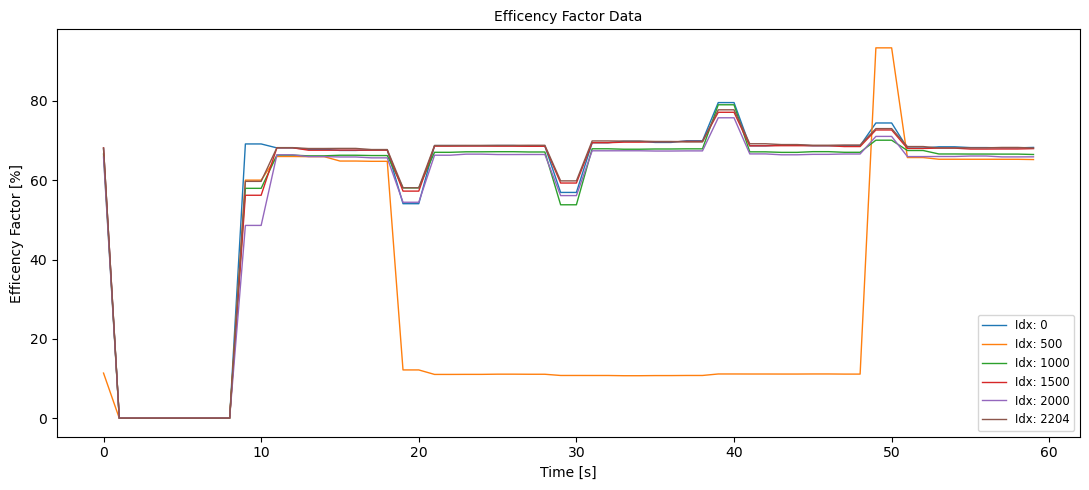

In [36]:
idx = [0 , 500, 1000, 1500, 2000, 2204]
fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

for i in idx:
    ax.plot(data['se'].iloc[i], label=f"Idx: {i}", linewidth=1)

ax.set_title('Efficency Factor Data', fontsize=10)
plt.xlabel("Time [s]")
plt.ylabel("Efficency Factor [%]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([data['se'], df_target], axis=1)
mean_per_condition = (
    df_combined.drop(columns=['Valve_Condition'], axis=1) 
      .groupby(df_combined['Valve_Condition'])           
      .mean()                                
      .mean(axis=1)
    )                             
print(mean_per_condition)

<h2>TS Sensors (1 Hz)</h2>

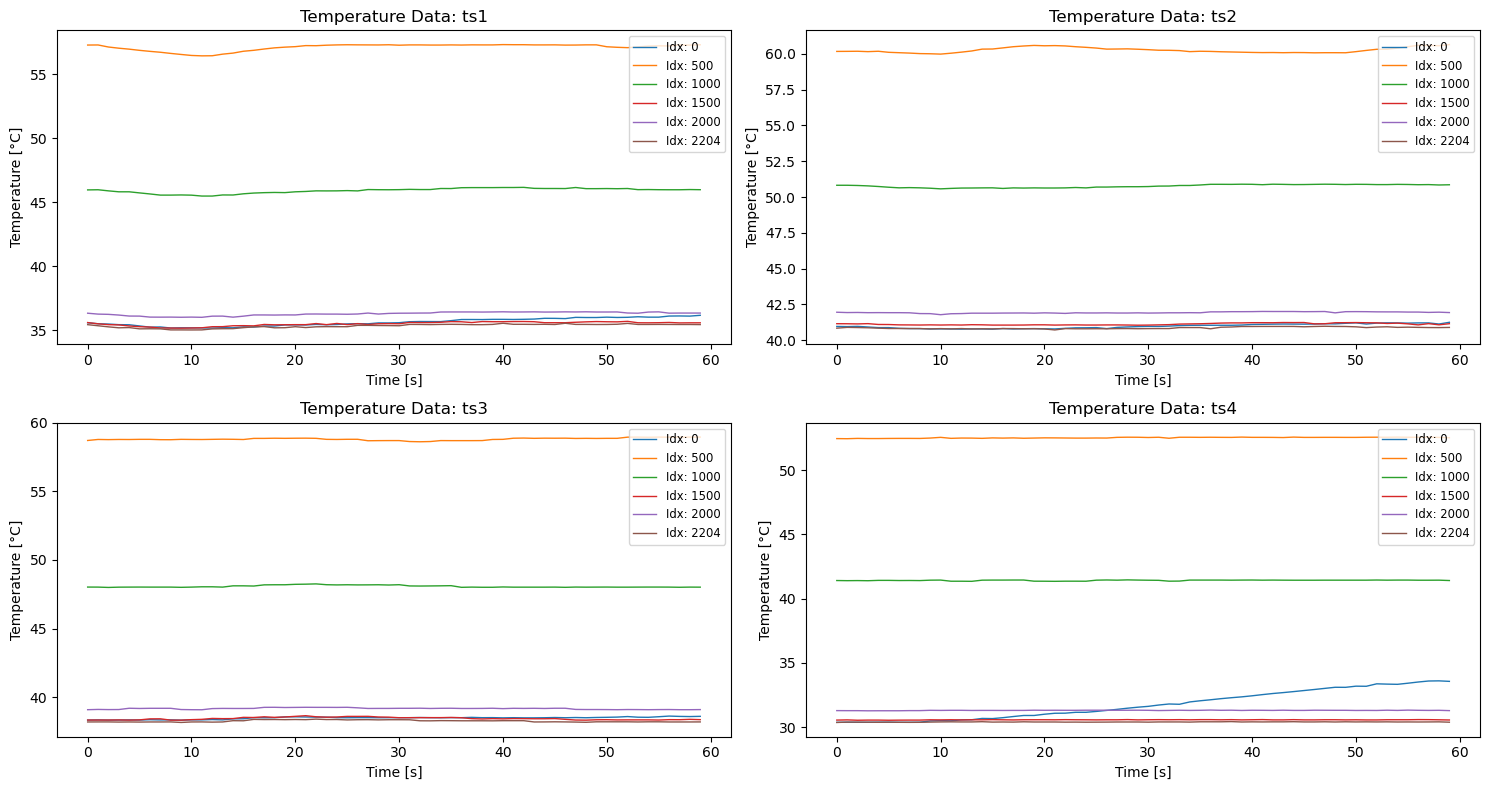

In [ ]:
temp_sensors = ['ts1', 'ts2', 'ts3', 'ts4']

fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(temp_sensors):
    ax = axes[idx]
    for i in range(data[s].shape[0]-1):
        ax.plot(data[s].iloc[i], color='blue', linewidth=0.5)
    ax.plot(data[s].mean(axis=0), color='red', linewidth=1, label = 'Mean')
    
    ax.set_title(f"Temperature Data: {s}")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Temperature [°C]")
    
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3>TS Sensors - Single Rows</h3>

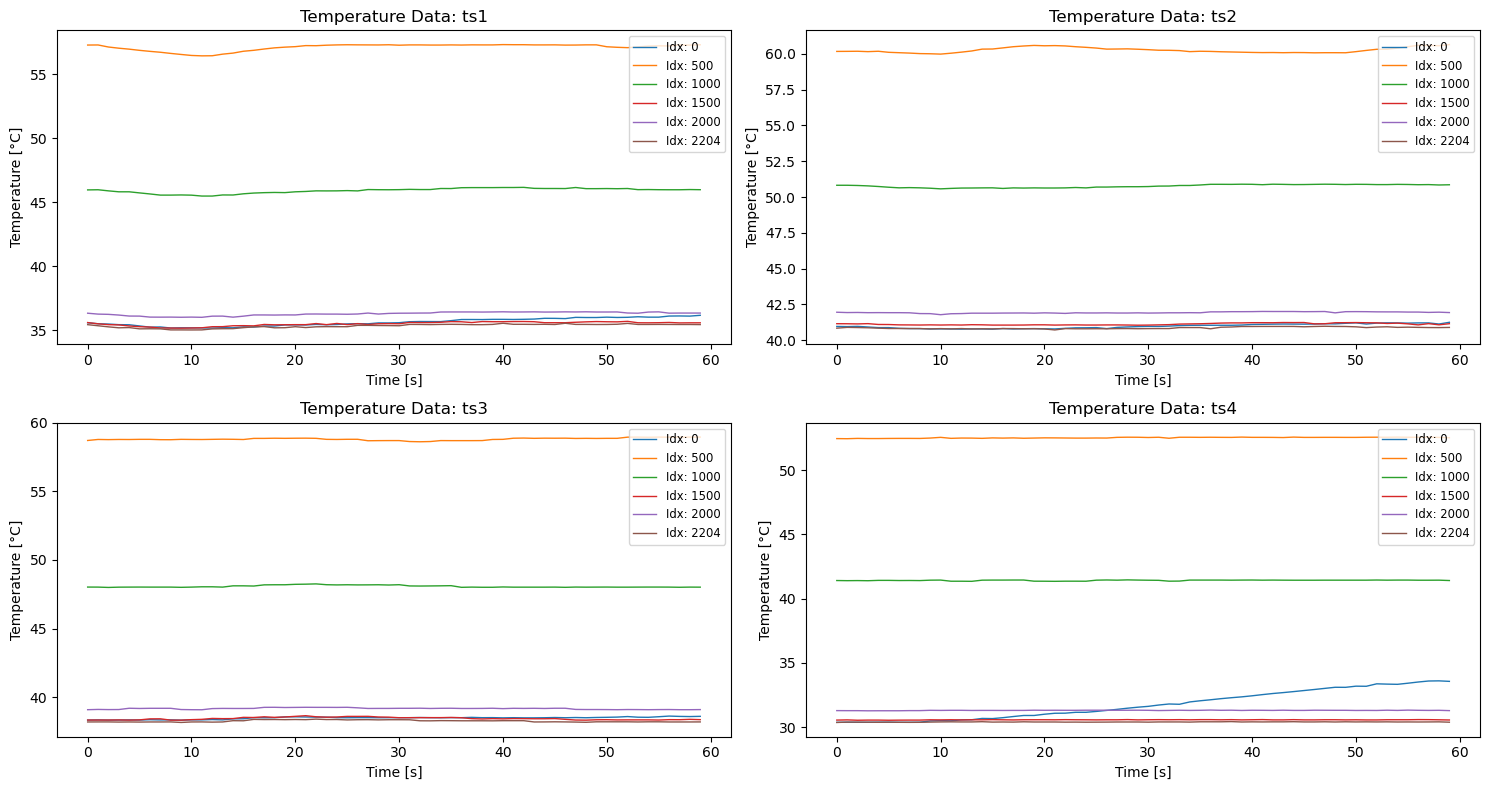

In [41]:
temp_sensors = ['ts1', 'ts2', 'ts3', 'ts4']
idx = [0 , 500, 1000, 1500, 2000, 2204]

fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
axes = axes.flatten()

for i, s in enumerate(temp_sensors):
    ax = axes[i]
    for j in idx:
        ax.plot(data[s].iloc[j], label=f"Idx: {j}",linewidth=1)    
    ax.set_title(f"Temperature Data: {s}")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Temperature [°C]")
    ax.legend(loc='best', fontsize='small')    
plt.tight_layout()
plt.show()

In [ ]:
for s in temp_sensors:
    df_combined = pd.concat([data[s], df_target], axis=1)
    mean_per_condition = (
        df_combined.drop(columns=['Valve_Condition'], axis=1) 
          .groupby(df_combined['Valve_Condition'])           
          .mean()                                
          .mean(axis=1)
        )
    print(s + ':')                             
    print(mean_per_condition)

<h2>FS Sensors (10 Hz)</h2>

In [ ]:
vf_sensors = ['fs1', 'fs2']

fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(vf_sensors):
    ax = axes[idx]
    for i in range(data[s].shape[0] - 1):
        ax.plot(data[s].iloc[i], color='blue', linewidth=0.5)
    ax.plot(data[s].mean(axis=0), color='red', linewidth=1, label='Mean')
    
    ax.set_title(f"Volume Flow Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Volume Flow [l/min]")
    
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

<h3>FS Sensors - Single Rows </h3>

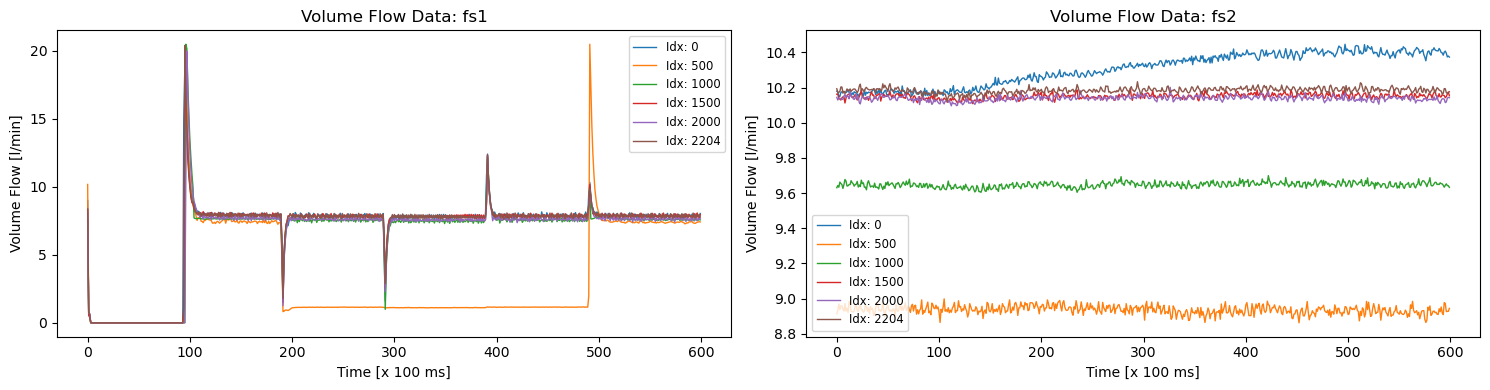

In [48]:
vf_sensors = ['fs1', 'fs2']
idx = [0 , 500, 1000, 1500, 2000, 2204]

fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axes = axes.flatten()

for i, s in enumerate(vf_sensors):
    ax = axes[i]
    for j in idx:
        ax.plot(data[s].iloc[j], label=f"Idx: {j}",linewidth=1)    
    ax.set_title(f"Volume Flow Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Volume Flow [l/min]")
    ax.legend(loc='best', fontsize='small')    
plt.tight_layout()
plt.show()

In [ ]:
for s in vf_sensors:
    df_combined = pd.concat([data[s], df_target], axis=1)
    mean_per_condition = (
        df_combined.drop(columns=['Valve_Condition'], axis=1) 
          .groupby(df_combined['Valve_Condition'])           
          .mean()                                
          .mean(axis=1)
        )
    print(s + ':')                             
    print(mean_per_condition)

<h2>EPS Sensor (100 Hz)</h2>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
for i in range(data['eps1'].shape[0] - 1):
    ax.plot(data['eps1'].iloc[i], color='blue', linewidth=0.5)

ax.plot(data['eps1'].mean(axis=0), color='red', linewidth=1, label='Mean')

ax.set_title('Motor power Data', fontsize=10)
plt.xlabel("Time [x 10 ms]")
plt.ylabel("Motor power [W]")
plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

<h3>EPS Sensor - Single Rows </h3>

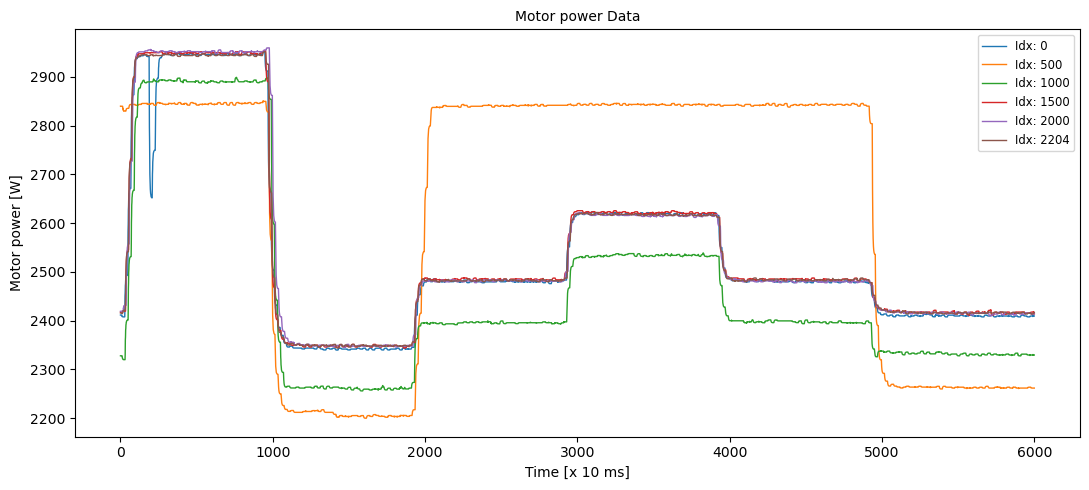

In [46]:
idx = [0 , 500, 1000, 1500, 2000, 2204]
fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

for i in idx:
    ax.plot(data['eps1'].iloc[i], label=f"Idx: {i}", linewidth=1)

ax.set_title('Motor power Data', fontsize=10)
plt.xlabel("Time [x 10 ms]")
plt.ylabel("Motor power [W]")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([data['eps1'], df_target], axis=1)
mean_per_condition = (
    df_combined.drop(columns=['Valve_Condition'], axis=1) 
      .groupby(df_combined['Valve_Condition'])           
      .mean()                                
      .mean(axis=1)
    )                             
print(mean_per_condition)

In [24]:
# #Ausreiser entfernen
# remove_row = data['eps1'][np.any(data['eps1'].values < 2150, axis=1)]
# remove_row
# data['eps1'] = data['eps1'].drop(remove_row.index)

<h2>PS Sensors (100 Hz)</h2>

In [ ]:
ps_sensors = ['ps1', 'ps2', 'ps3', 'ps4', 'ps5', 'ps6']

fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
axes = axes.flatten()

for idx, s in enumerate(ps_sensors):
    ax = axes[idx]
    
    # Nur jede 10. Spalte auswählen
    # reduced_data = data[s].iloc[:, ::10]
    
    for i in range(data[s].shape[0] - 1):
        ax.plot(data[s].iloc[i], color='blue', linewidth=0.5)
    
    ax.plot(data[s].mean(axis=0), color='red', linewidth=1, label = 'Mean')
    
    ax.set_title(f"Pressure Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Pressure [Bar]")
    
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()


<h3>PS Sensors - Single Rows </h3>

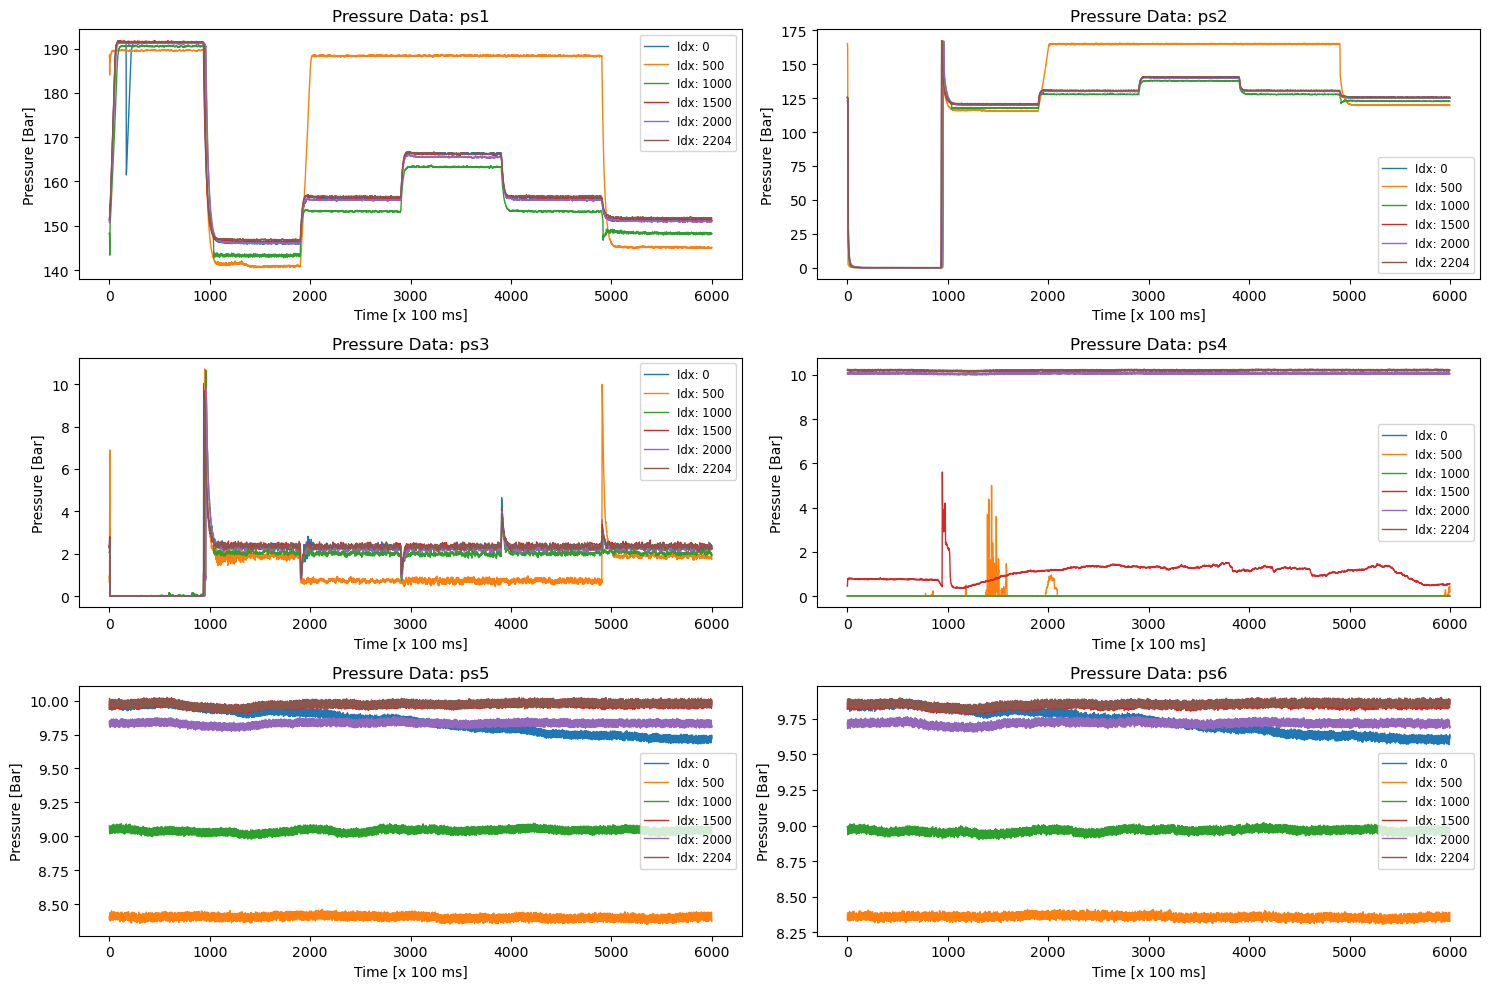

In [50]:
ps_sensors = ['ps1', 'ps2', 'ps3', 'ps4', 'ps5', 'ps6']
idx = [0 , 500, 1000, 1500, 2000, 2204]

fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
axes = axes.flatten()

for i, s in enumerate(ps_sensors):
    ax = axes[i]
    for j in idx:
        ax.plot(data[s].iloc[j], label=f"Idx: {j}",linewidth=1)    
    ax.set_title(f"Pressure Data: {s}")
    ax.set_xlabel("Time [x 100 ms]")
    ax.set_ylabel("Pressure [Bar]")
    ax.legend(loc='best', fontsize='small')    
plt.tight_layout()
plt.show()

In [ ]:
for s in ps_sensors:
    df_combined = pd.concat([data[s], df_target], axis=1)
    mean_per_condition = (
        df_combined.drop(columns=['Valve_Condition'], axis=1) 
          .groupby(df_combined['Valve_Condition'])           
          .mean()                                
          .mean(axis=1)
        )
    print(s + ':')                             
    print(mean_per_condition)

<h2> Valve Condition </h2>

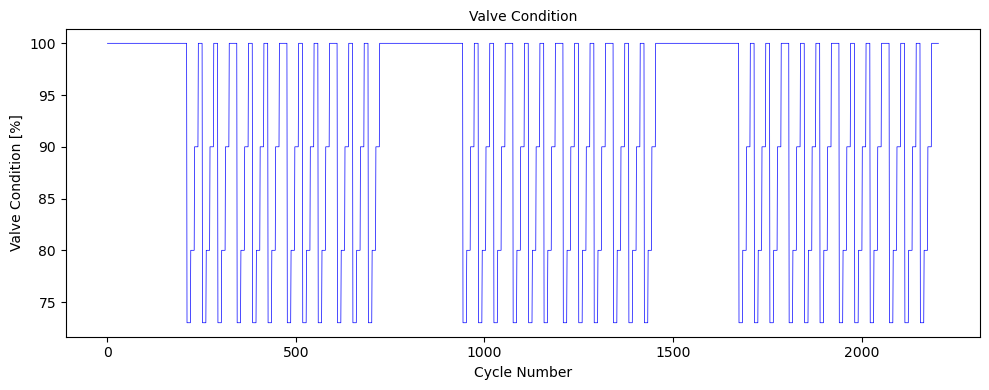

In [51]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

ax.plot(df_target, color='blue', linewidth=0.5)

ax.set_title('Valve Condition', fontsize=10)
plt.xlabel("Cycle Number")
plt.ylabel("Valve Condition [%]")


plt.tight_layout()
plt.show()

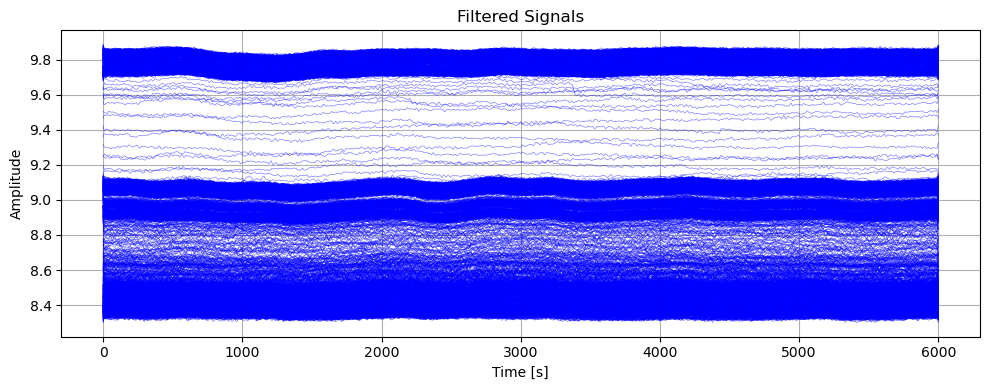

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the Butterworth lowpass filter
def butter_lowpass(cutoff, fs, order):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Parameters for the filter
order = 6        # Filter order
fs = 100         # Sampling frequency (Hz)
cutoff = 5   # Cutoff frequency (Hz)

# Apply Butterworth filter to each row
filtered_data = data['ps6'].apply(lambda row: butter_lowpass_filter(row, cutoff, fs, order), axis=1)

# Plot all filtered signals in one graph
plt.figure(figsize=(10, 4))

for idx in range(filtered_data.shape[0]):
    plt.plot(filtered_data.iloc[idx], color = 'blue', alpha=0.5, linewidth=0.5)  # Adjust alpha and linewidth for better visualization

plt.title('Filtered Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

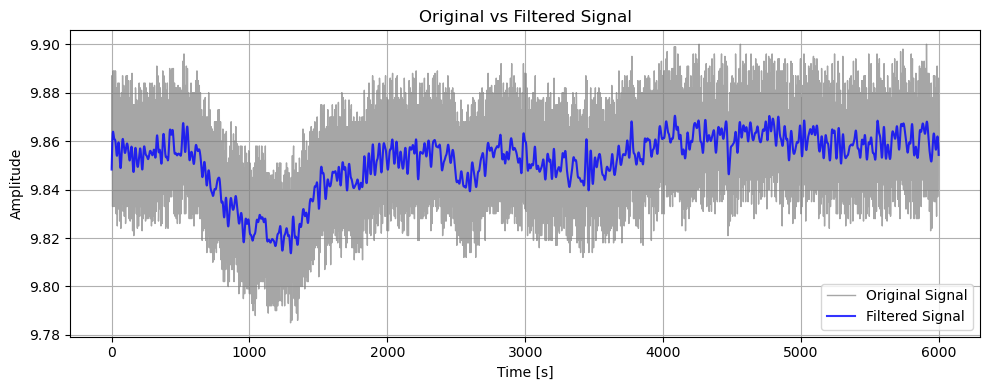

In [69]:
# Define the Butterworth lowpass filter
def butter_lowpass(cutoff, fs, order):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Parameters for the filter
order = 6        # Filter order
fs = 100         # Sampling frequency (Hz)
cutoff = 5       # Cutoff frequency (Hz)

# Extract the signal (assumed to be a row with multiple columns)
signal_data = data['ps6'].iloc[2204] # Use .loc[] for label-based indexing

# Ensure the data is in a suitable array format (convert to numpy if necessary)
signal_data = np.array(signal_data)

# Apply the Butterworth filter to the signal
filtered_signal = butter_lowpass_filter(signal_data, cutoff, fs, order)

# Plot the original and filtered signals
plt.figure(figsize=(10, 4))

plt.plot(signal_data, label="Original Signal", color='gray', alpha=0.7, linewidth=1)
plt.plot(filtered_signal, label="Filtered Signal", color='blue', alpha=0.8, linewidth=1.5)

plt.title('Original vs Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
filtered_data